# This is a Simple Logistic Regression Program to Classify Iris Species

**Importing libraries**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**Importing Dataset**

In [3]:
df = pd.read_csv("../IRIS DATASET/Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])

Rows : 150
Columns : 6


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

**Plotting Graphs For Dataset**

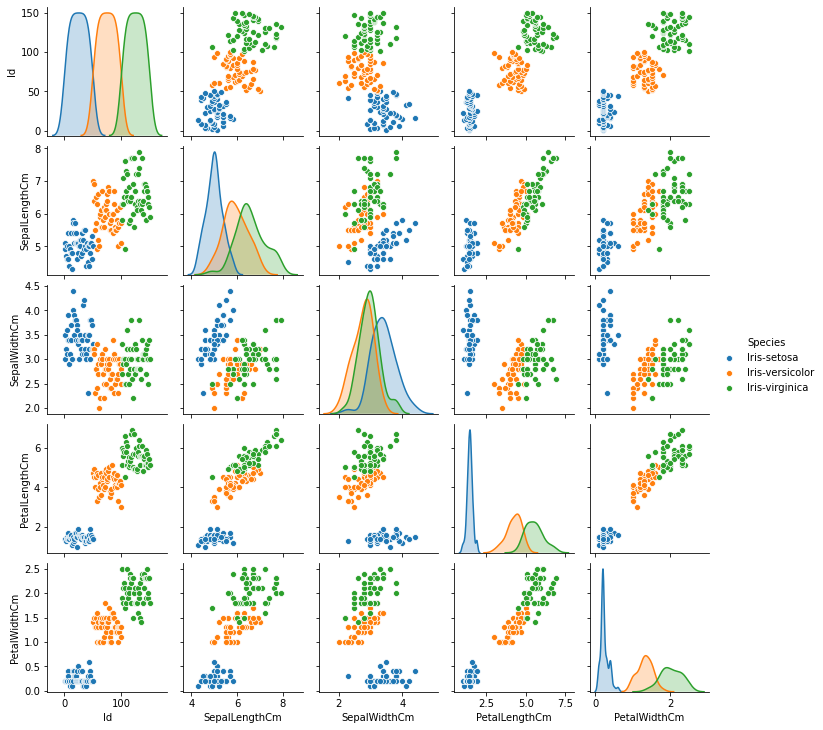

In [11]:
sns.pairplot(df,hue='Species',height=2)

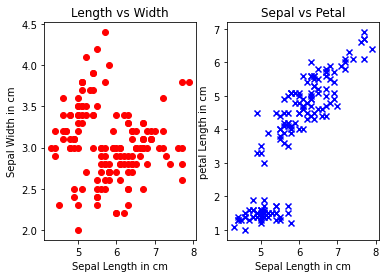

In [12]:
plt.subplot(1, 2, 1)
plt.scatter(x = df['SepalLengthCm'], y = df['SepalWidthCm'], color = 'red', marker = 'o',)
plt.title('Length vs Width')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Sepal Width in cm')

plt.subplot(1, 2, 2)
plt.scatter(x = df['SepalLengthCm'], y = df['PetalLengthCm'], color = 'blue', marker = 'x',)
plt.title('Sepal vs Petal')
plt.xlabel('Sepal Length in cm')
plt.ylabel('petal Length in cm')
plt.show()

**Preparing Training Set**

In [13]:
features = list(df.columns)

print(features)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [14]:
features.remove('Id')
features.remove('Species')

print(features)

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [16]:
Y = df.Species                                        # Target Data
X = df[features].values.astype(np.float32)            # Training Data

print(X.shape)
print(Y.shape)

(150, 4)
(150,)


In [21]:
# Splitting data into 80% for training and 20% for testing 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# feeding the into the scaler

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [26]:
model = LogisticRegression()
model.fit(x_train, y_train) # Training the model 

LogisticRegression()

In [ ]:
#Testing The model
y_pred = model.predict(x_test)

print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

#Check precision, recall, f1-score
print(classification_report(y_test, y_pre))